In [1]:
#!/usr/bin/env python
# coding: utf-8

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10,10

from scipy.ndimage.interpolation import zoom
import sys
sys.path.insert(0,'..')
from Classifier import VGG
from utils import gradcamutils
import innvestigate
import numpy as np
import os
from PIL import Image
import innvestigate

from Classifier.VGG import *

Using TensorFlow backend.


In [2]:
# use this environment flag to change which GPU to use 
os.environ["CUDA_VISIBLE_DEVICES"]="-1"  # specify which GPU(s) to be used

In [3]:
def createOrRestoreModel(): 
    vggModel = VGG.VGG19((224,224,3),3, False) #set up model architecture

    vggModel.summary()
    vggModel.load_weights("VGG19_COVID19-v2.h5") #load weights

    model = vggModel

    return model 

In [4]:
model = createOrRestoreModel() 

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 2)       56        
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 2)       38        
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 2)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 4)       76        
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 4)       148       
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 4)         0     

In [17]:
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity

IMAGE_PATH = "../Example_images/CE13BB46-B19A-4B06-92CE-C479125C6CEA.jpeg"
img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)

data = ([img], None)
class_index = 2
explainer = OcclusionSensitivity()
patch_size = 6

grid2 = explainer.explain(data, model, class_index, patch_size=patch_size, colormap=2)
grid1 = explainer.explain(data, model, 1, patch_size=patch_size, colormap=2)
grid0 = explainer.explain(data, model, 0, patch_size=patch_size, colormap=2)

#explainer.save(grid, '.', 'occsens.png')
#output = explainer.explain(<data>, <model>, <layer_name>, <class_index>, <colormap(optional)>)
#explainer.save(output, output_dir, output_name)

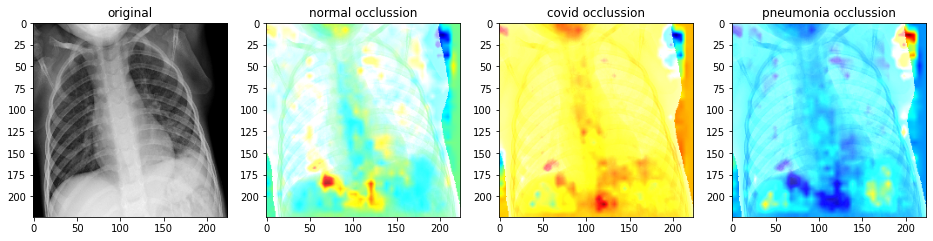

In [20]:
import matplotlib.image as mpimg
import matplotlib.cm as cm

img2 = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(224, 224))

figure, axs = plt.subplots(1, 4, figsize=(16, 4))
axs[0].imshow(img2, cmap=cm.gray)
axs[0].set_title("original")
axs[2].imshow(grid2)
axs[2].set_title("covid occlussion")
axs[3].imshow(grid1)
axs[3].set_title("pneumonia occlussion")
axs[1].imshow(grid0)
axs[1].set_title("normal occlussion")
plt.show()  # display it

In [22]:
img2 = img.reshape(1, 224, 224, 3)

img_label = model.predict(img2)
print("Predykcje: 0 - normal, 1 - covid, 2 - pneumonia")
print("Tutaj: ", np.argmax(img_label))

Predykcje: 0 - normal, 1 - covid, 2 - pneumonia
Tutaj:  1
